# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=M/N=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### $1)$

In [347]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np 
import matplotlib.pyplot as plt
from statistics import mean

S = ["Internal Energy", "Pressure"]
I = ["U/N", "P"]
M = ["epot", "pres"]
state = ["solid","liquid","gas"]

In [348]:
solid_U, solid_P = np.loadtxt('MonteCarlo_NVT\output.solid.insta', usecols=(1,2), unpack=True, skiprows=500)
liquid_U, liquid_P = np.loadtxt('MonteCarlo_NVT\output.liquid.insta', usecols=(1,2), unpack=True, skiprows=500)
gas_U, gas_P = np.loadtxt('MonteCarlo_NVT\output.gas.insta', usecols=(1,2), unpack=True, skiprows=500)
solid = [solid_U,solid_P]
liquid = [liquid_U,liquid_P]
gas = [gas_U,gas_P]
file = [solid, liquid, gas]

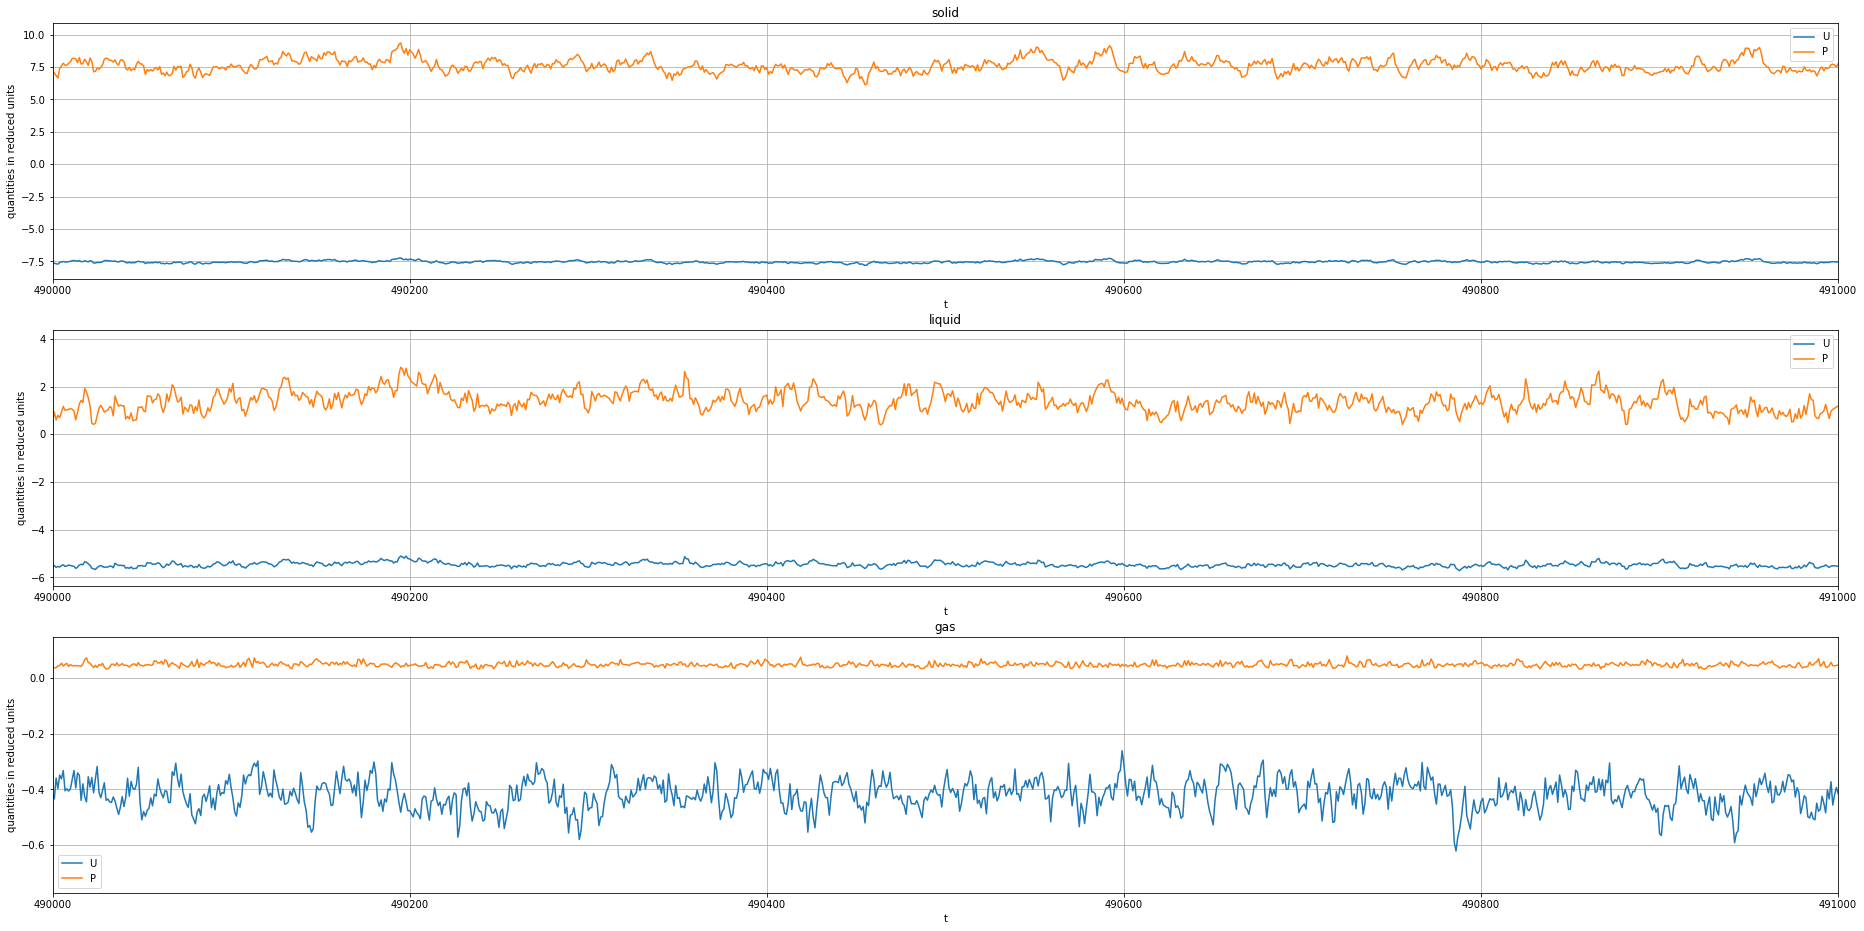

In [350]:
t = np.linspace(0, len(solid[0]), len(solid[0]))
fig, axx = plt.subplots(3, 1, figsize=(32, 16))
axx = axx.reshape(-1)
for s in range(3):
    ax = axx[s]
    ax.set_title(state[s])
    ax.plot(t, file[s][0], label = 'U')
    ax.plot(t, file[s][1], label = 'P')
    ax.set_xlabel('t')
    ax.set_xlim(490000,491000)
    ax.legend()
    ax.set_ylabel('quantities in reduced units')
    ax.grid()

This graphs are made using a simulation of $M=5\cdot10^5$ steps. Here I plotted 1000 steps randomly in all the period.

### $2)$

Autocorrelation function: 
$$ Ac_{[x]}(t) := \chi(t) = \frac{\langle \ x(t') \; x(t'+t) \ \rangle_{t'} - \langle \ x \ \rangle ^2}{\sigma_x^2} $$ 


If discrete time:
$$ Ac_{[x]}(t) := \chi(t) = \frac {\frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t}x(t')x(t'+t) - \frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t}x(t') \cdot \frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t}x(t'+t)}
{\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}x^2(t') - \left( \frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}x(t')  \right)^2}  $$

In [362]:
def chi(vec, tn):
    auto = []
    tmax = len(vec)-1
    sum1 = np.sum([ vec[tt]*vec[tt] for tt in range(0,tmax+1)])
    sum4 = np.sum(vec[0:tmax])
    sum5 = np.sum([i**2 for i in vec[0:tmax]])
    sum2 = np.sum(vec[0:tmax])
    sum3 = sum2
    auto.append( (sum5/tmax - sum2*sum3/tmax**2) / (sum5/tmax - (sum4/tmax)**2) )
    for t in range(1,tn):
        sum1 = np.sum([ vec[tt]*vec[tt+t] for tt in range(0,tmax-t+1)])
        sum2 = sum2 - vec[tmax-t+1]
        sum3 = sum3 - vec[t-1]
        auto.append( (sum1/(tmax-t) - sum2*sum3/(tmax-t)**2) / (sum5/tmax - (sum4/tmax)**2) )
    return auto

In [363]:
tmax = 250
chi_solid = []
chi_liquid = []
chi_gas = []

for i in range (2):
    chi_solid.append(chi(solid[i], tmax))
    chi_liquid.append(chi(liquid[i], tmax))
    chi_gas.append(chi(gas[i], tmax))

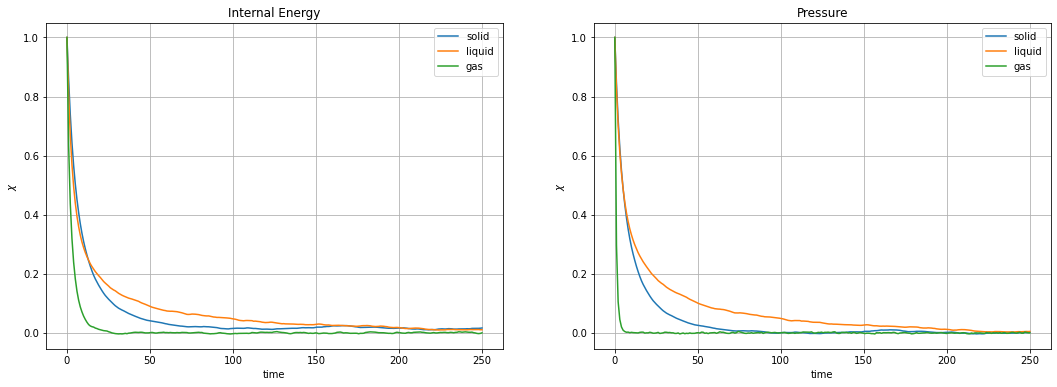

In [364]:
t = np.linspace(0,tmax,tmax)
fig, axx = plt.subplots(1, 2,figsize=(18, 6))
for i,ax in enumerate(axx):
    ax.plot(t, chi_solid[i], label = "solid")
    ax.plot(t, chi_liquid[i], label = "liquid")
    ax.plot(t, chi_gas[i], label = "gas")
    ax.set_xlabel('time')
    ax.set_ylabel(r"$\chi$")
    ax.set_title(S[i])
    ax.legend()
    ax.grid()

We can see when the autocorrelation functions reach the zero, so we know when our data are no longer correlated.
For the gas, which is the less correlated system because of his chaoticity, the autocorrelation function reach the zero after about less than 50 steps. The more correlated system turns out to be the liquid.
Let's compute the uncertainties.

In [375]:
def sigma(vect, l):
    nblock = int(len(vect)/l)
    av = [mean(vect[int(k*l):int((k+1)*length-1)]) for k in range(nblock)]
    av2 = [a**2 for a in av]
    return np.sqrt((mean(av2) - mean(av)**2)/nblock)

In [373]:
nbins=10
ls = [10, 50, 100, 200, 400, 500, 1000, 2000, 4000, 5000]
sigma_solid = []
sigma_liquid = []
sigma_gas = []
for i in range(2):
    sigma_solid.append([sigma(solid[i],l) for l in ls])
    sigma_liquid.append([sigma(liquid[i],l) for l in ls])
    sigma_gas.append([sigma(gas[i],l)for l in ls])

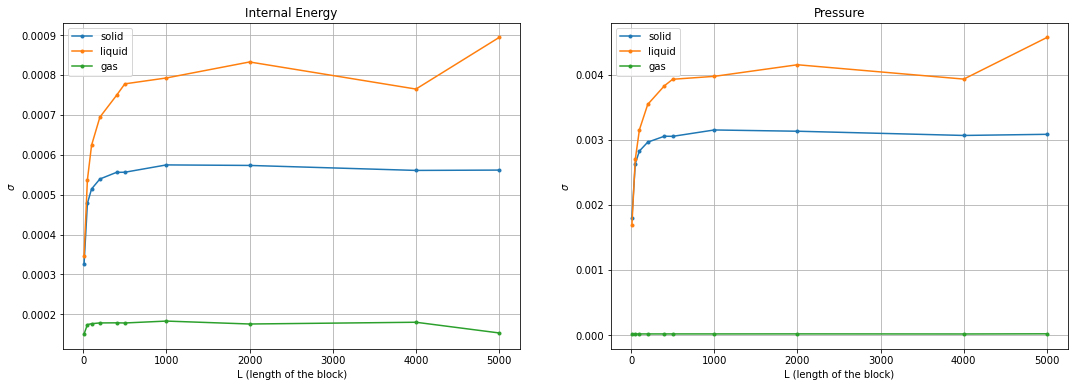

In [385]:
fig, axx = plt.subplots(1,2,figsize=(18,6))
for i,ax in enumerate(axx):
    ax.plot(Ls, sigma_solid[i], label = r"solid", marker = '.')
    ax.plot(Ls, sigma_liquid[i], label = r"liquid", marker = '.')  
    ax.plot(Ls, sigma_gas[i], label = r"gas", marker = '.')    
    ax.set_xlabel('L (length of the block)')
    ax.set_ylabel('$\sigma$')
    ax.set_title(S[i])
    ax.grid()
    ax.legend()

This graphs show us that the best choice for the length of the blocks is 1000, in fact after this number, the uncertainties saturate. So we can build block of this measure.

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

In [377]:
gofr = [[],[],[]]
for i in range(3):
    r, gr, err_gofr = np.loadtxt('MonteCarlo_NVT/output.'+ state[i] +'.gave.0', usecols=(0,1,2), unpack=True)
    gofr[i].append(r)
    gofr[i].append(gr)
    gofr[i].append(err_gofr)

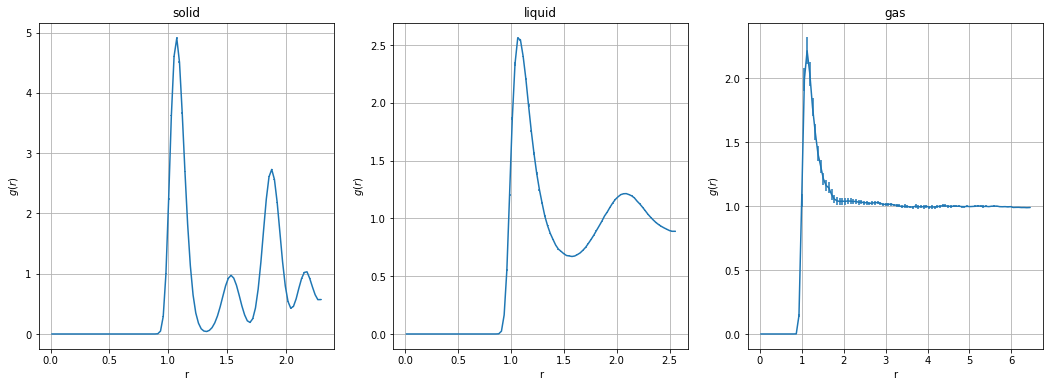

In [378]:
fig, axx = plt.subplots(1,3,figsize=(18,6))
for i,ax in enumerate(axx):
    ax.errorbar(gofr[i][0], gofr[i][1], gofr[i][2])
    ax.set_xlabel('r')
    ax.set_ylabel(r'$g(r)$')
    ax.set_title(state[i])
    ax.grid()

This graphs are obtained filling an histogram between 0 and L/2. We can see how the solid $g(r)$ has higher peaks, this because of a rigid latter that makes the particles to stay at a precise distance. The peaks of the other phase are less marked. The gas phase is the most chaotic system.

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

In [379]:
gofr = [[],[],[]]
for i in range(3):
    r, gr, err_gofr = np.loadtxt("../04/MolecularDynamics_NVE/output." + state[i] +'.gave.0', usecols=(0,1,2), unpack=True)
    gofr[i].append(r)
    gofr[i].append(gr)
    gofr[i].append(err_gofr)

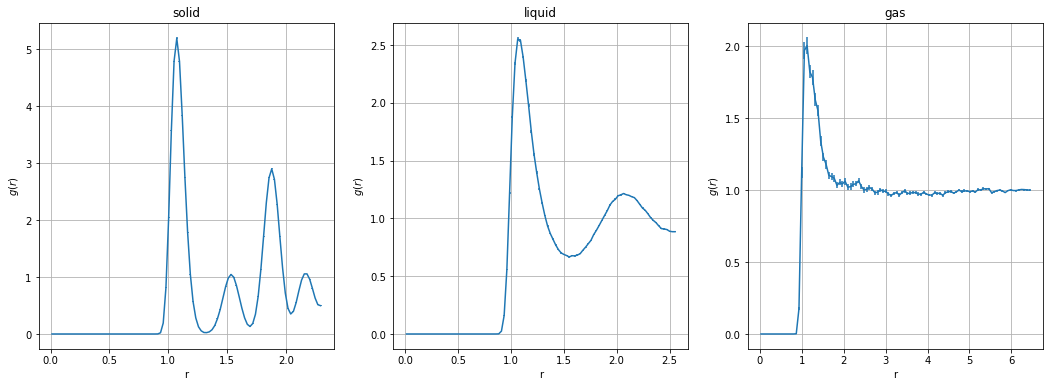

In [380]:
fig, axx = plt.subplots(1,3,figsize=(18,6))
for i,ax in enumerate(axx):
    ax.errorbar(gofr[i][0], gofr[i][1], gofr[i][2])
    ax.set_xlabel('r')
    ax.set_ylabel(r'$g(r)$')
    ax.set_title(state[i])
    ax.grid()

The same can be told about this $g(r)$ distribution of the previous exercitation. Particularly the 2 graphs are pretty comparable.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [381]:
en = [[],[],[]]
pres = [[],[],[]]

for i in range(3):
    n, x, err = np.loadtxt("MonteCarlo_NVT\output."+state[i]+".epot.0", usecols=(0,2,3), unpack=True)
    en[i].append(n)
    en[i].append(x)
    en[i].append(err)
    n, x, err = np.loadtxt("MonteCarlo_NVT\output."+state[i]+".pres.0", usecols=(0,2,3), unpack=True)
    pres[i].append(n)
    pres[i].append(x)
    pres[i].append(err)

In [382]:
sigma = 0.34e-9
eps_kb = 120
m = 39.948*1.66e-27
kb = 1.38e-23
eps = eps_kb * kb
dt = np.sqrt( m*sigma**2/eps)
coeff = [dt, eps, eps/sigma**3]

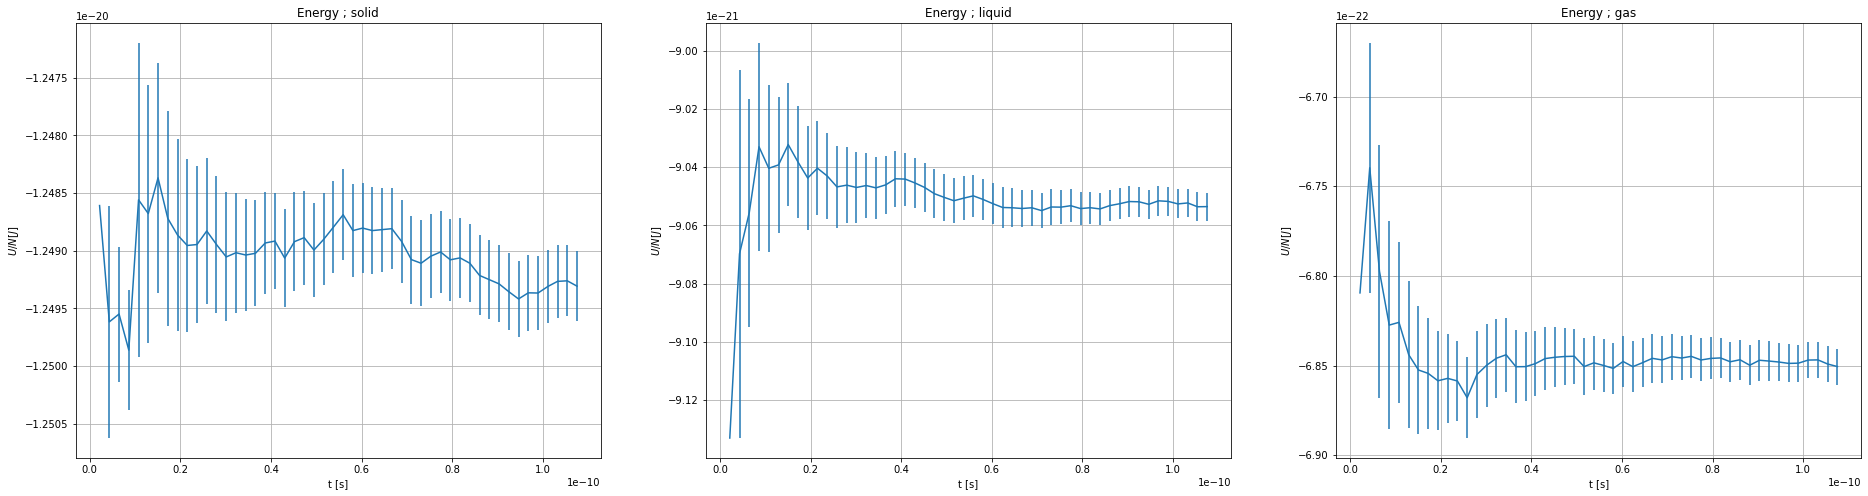

In [383]:
fig, axx = plt.subplots(1,3,figsize=(32,8))
axx = axx.reshape(-1)

for i in range(3):
    ax = axx[i]
    ax.errorbar(
        en[i][0]*coeff[0],
        en[i][1]*coeff[1],
        en[i][2]*coeff[1])
    ax.set_xlabel('t [s]')
    ax.set_ylabel(r"$U/N [J]$")
    ax.set_title("Energy ; " + state[i])
    ax.grid()

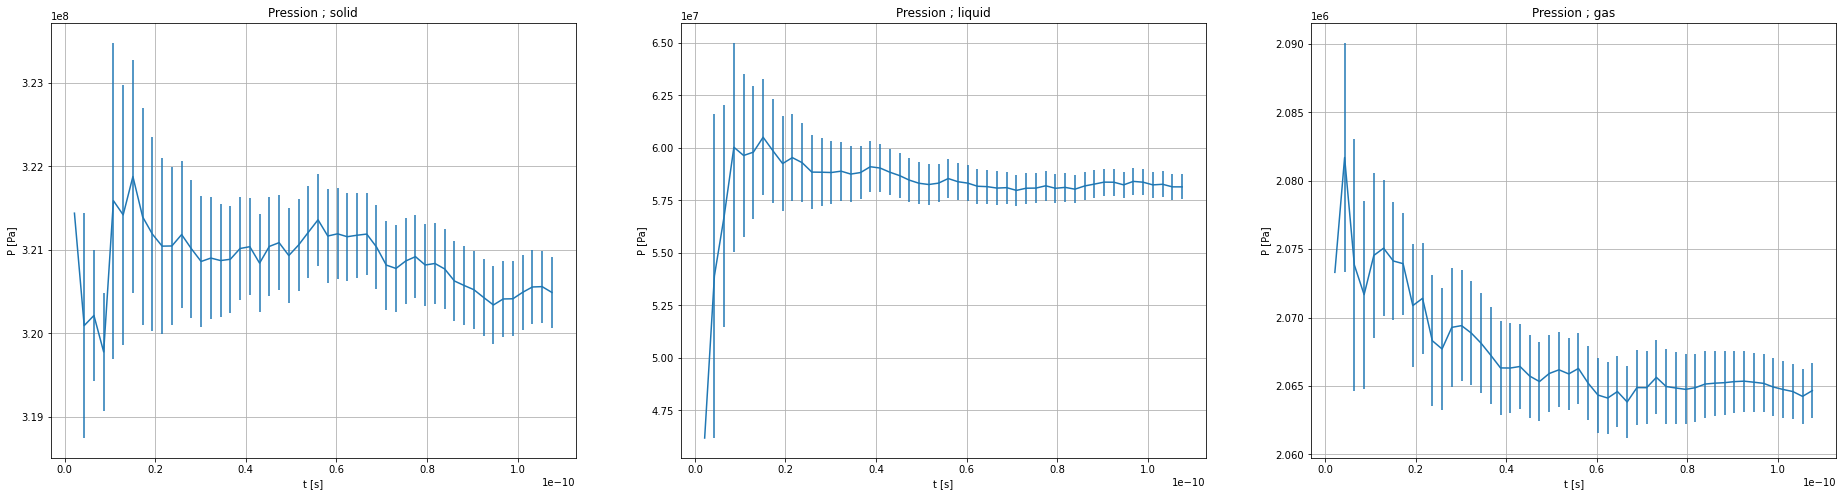

In [387]:
fig, axx = plt.subplots(1,3,figsize=(32,8))
axx = axx.reshape(-1)

for i in range(3):
    ax = axx[i]
    ax.errorbar(
        pres[i][0]*coeff[0],
        pres[i][1]*coeff[2],
        pres[i][2]*coeff[2])
    ax.set_xlabel('t [s]')
    ax.set_ylabel(r"P [Pa]")
    ax.set_title("Pression ; " + state[i])
    ax.grid()

After equilibration, the physical quantities show a convergence toward a fixed value. As usual blocking method has been used, with $N = 50$ block of $L = 1000$ length.